In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\DAMILOLA\Videos\Income_Statement.csv')

# Display the first few rows of the dataset
print(df.head())

# Display the summary of the dataset
print(df.info())

   Year  Month     Company_Type  Sales_Revenue  Production_Costs  \
0  2006      9         Exporter        1747818            143199   
1  2019      4  Microenterprise        2826374           1300101   
2  2014     11         Exporter        2368620           1356748   
3  2010      3         Exporter        3537379           2146697   
4  2007      4         Exporter        2610837           1672433   

   Operating_Expenses  Financial_Expenses  Other_Revenues  Other_Expenses  \
0              972777               29881           55371           15654   
1              455472               12771           42816           11078   
2              560031               18298           89460           28030   
3              200824               14340           44112            7572   
4              605091               33356           51048           17408   

    Taxes  Net_Income  Gross_Margin  Operating_Margin  Net_Margin  \
0  197385      181903     19.123104         16.525512   18.

In [7]:
# Check for missing columns
required_columns = ['Year', 'Month', 'Company_Type', 'Sales_Revenue', 'Production_Costs', 'Operating_Expenses', 'Financial_Expenses', 'Other_Revenues', 'Other_Expenses', 'Taxes', 'Net_Income']

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print("Missing columns: ", missing_columns)
else:
    print("All necessary columns are present.")

All necessary columns are present.


In [8]:
# Handle missing values
df = df.dropna()  # Drop rows with any missing values

# Remove duplicates
df = df.drop_duplicates()

# Standardize formats (e.g., ensure all numeric columns are in the correct format)
numeric_columns = ['Sales_Revenue', 'Production_Costs', 'Operating_Expenses', 'Financial_Expenses', 'Other_Revenues', 'Other_Expenses', 'Taxes', 'Net_Income']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Display the cleaned dataset
print(df.head())
print("Data cleaning completed.")

   Year  Month     Company_Type  Sales_Revenue  Production_Costs  \
0  2006      9         Exporter        1747818            143199   
1  2019      4  Microenterprise        2826374           1300101   
2  2014     11         Exporter        2368620           1356748   
3  2010      3         Exporter        3537379           2146697   
4  2007      4         Exporter        2610837           1672433   

   Operating_Expenses  Financial_Expenses  Other_Revenues  Other_Expenses  \
0              972777               29881           55371           15654   
1              455472               12771           42816           11078   
2              560031               18298           89460           28030   
3              200824               14340           44112            7572   
4              605091               33356           51048           17408   

    Taxes  Net_Income  Gross_Margin  Operating_Margin  Net_Margin  \
0  197385      181903     19.123104         16.525512   18.

In [24]:
# Define categorization logic
def categorize_expenses(row):
    if row['Operating_Expenses'] > 0:
        return 'Operational Costs'
    elif row['Financial_Expenses'] > 0:
        return 'Financial Costs'
    elif row['Other_Expenses'] > 0:
        return 'Other Costs'
    else:
        return 'Unknown'

def categorize_inflows(row):
    if row['Sales_Revenue'] > 0:
        return 'Sales Revenue'
    elif row['Other_Revenues'] > 0:
        return 'Other Revenue'
    else:
        return 'Unknown'

# Apply categorization
df['Expense_Category'] = df.apply(categorize_expenses, axis=1)
df['Inflow_Category'] = df.apply(categorize_inflows, axis=1)

# Display the categorized dataset
print(df[['Expense_Category', 'Inflow_Category']].head())
print("Data categorization completed.")


             Expense_Category Inflow_Category
Date                                         
2000-01-01  Operational Costs   Sales Revenue
2000-01-01  Operational Costs   Sales Revenue
2000-01-01  Operational Costs   Sales Revenue
2000-01-01  Operational Costs   Sales Revenue
2000-01-01  Operational Costs   Sales Revenue
Data categorization completed.


In [12]:
# Create a mapping document
mapping_document = {
    'Expense_Category': {
        'Operational Costs': 'Operating_Expenses > 0',
        'Financial Costs': 'Financial_Expenses > 0',
        'Other Costs': 'Other_Expenses > 0',
        'Unknown': 'None of the above'
    },
    'Inflow_Category': {
        'Sales Revenue': 'Sales_Revenue > 0',
        'Other Revenue': 'Other_Revenues > 0',
        'Unknown': 'None of the above'
    }
}

# Save the mapping document to a file
import json
with open('mapping_document.json', 'w') as f:
    json.dump(mapping_document, f)

print("Mapping document created.")

Mapping document created.


In [14]:
# Create column for 'Expense_Category'
expense_columns = ['Production_Costs', 'Operating_Expenses', 'Financial_Expenses', 'Other_Expenses']

def categorize_expense(row):
    if row['Production_Costs'] > 0:
        return 'Production Costs'
    elif row['Operating_Expenses'] > 0:
        return 'Operating Expenses'
    elif row['Financial_Expenses'] > 0:
        return 'Financial Expenses'
    elif row['Other_Expenses'] > 0:
        return 'Other Expenses'
    else:
        return 'Unknown'

# Apply the function to create the 'Expense_Category' column
df['Expense_Category'] = df.apply(categorize_expense, axis=1)

# Verify
print(df[['Expense_Category']].head())

   Expense_Category
0  Production Costs
1  Production Costs
2  Production Costs
3  Production Costs
4  Production Costs


In [17]:
# Generate a breakdown of expenses by category
expense_breakdown = df[['Production_Costs', 'Operating_Expenses', 'Financial_Expenses', 'Other_Expenses']].sum()
print(expense_breakdown)

Production_Costs      3306317966
Operating_Expenses    1093552065
Financial_Expenses      53463323
Other_Expenses          52973136
dtype: int64


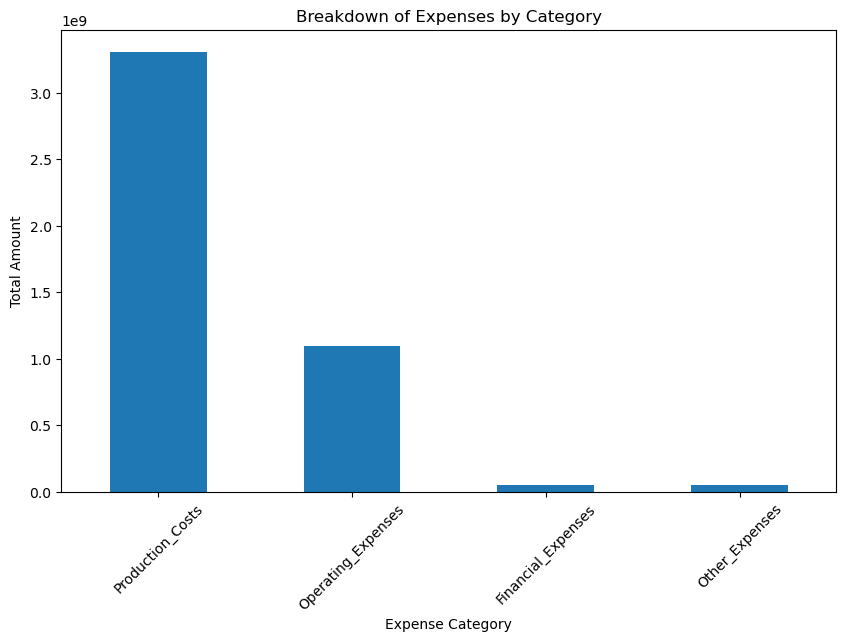

Breakdown of expenses by category plotted successfully.


In [18]:
# Create a visualization for the breakdown of expenses by category
plt.figure(figsize=(10, 6))
expense_breakdown.plot(kind='bar')
plt.title('Breakdown of Expenses by Category')
plt.xlabel('Expense Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

print('Breakdown of expenses by category plotted successfully.')

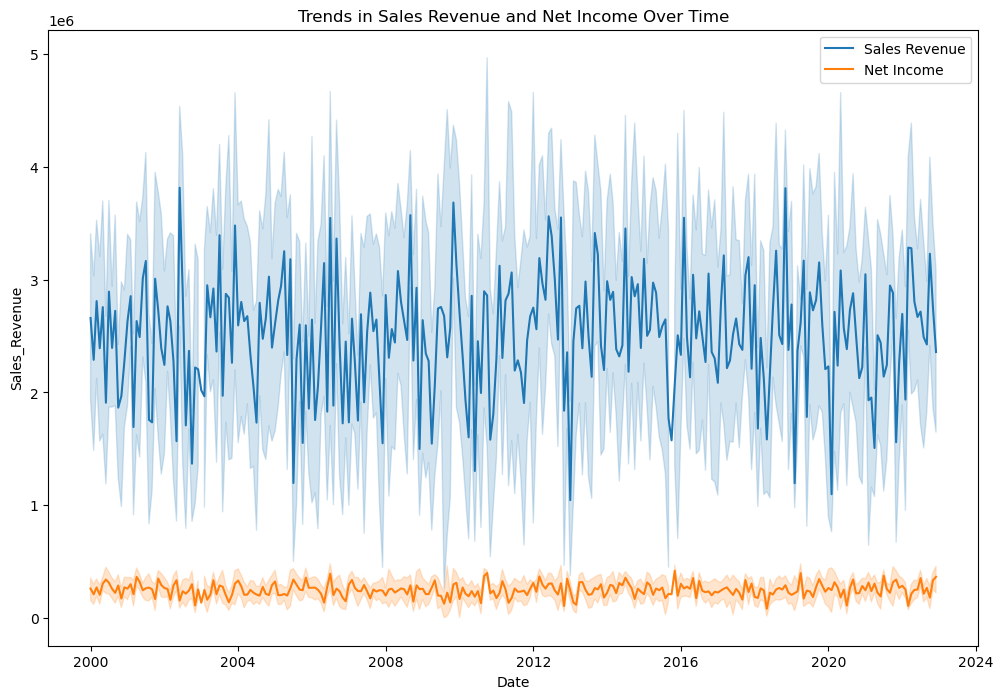

Trends analysis completed.


In [19]:
# Analyze trends over time
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
df = df.sort_values(by='Date')

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Date', y='Sales_Revenue', label='Sales Revenue')
sns.lineplot(data=df, x='Date', y='Net_Income', label='Net Income')
plt.title('Trends in Sales Revenue and Net Income Over Time')
plt.legend()
plt.show()

print("Trends analysis completed.")

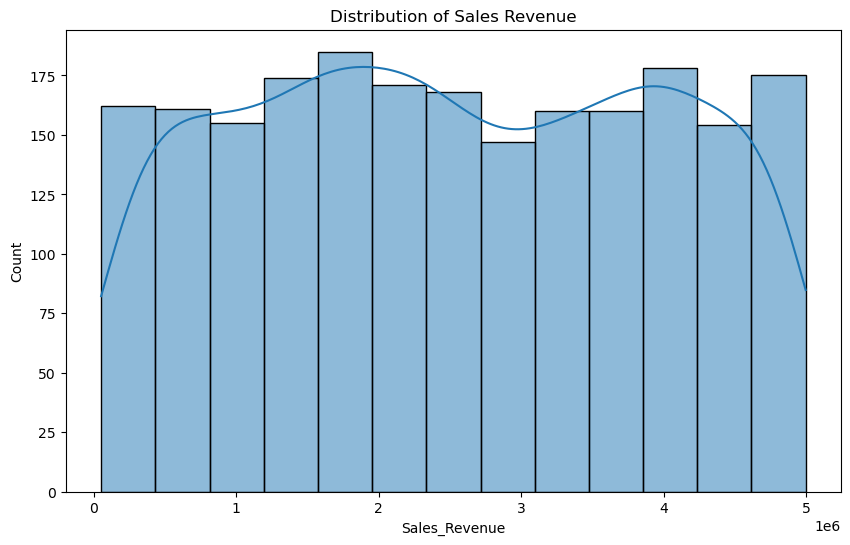

C:\Users\DAMILOLA\AppData\Local\Temp\ipykernel_10756\1097185171.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


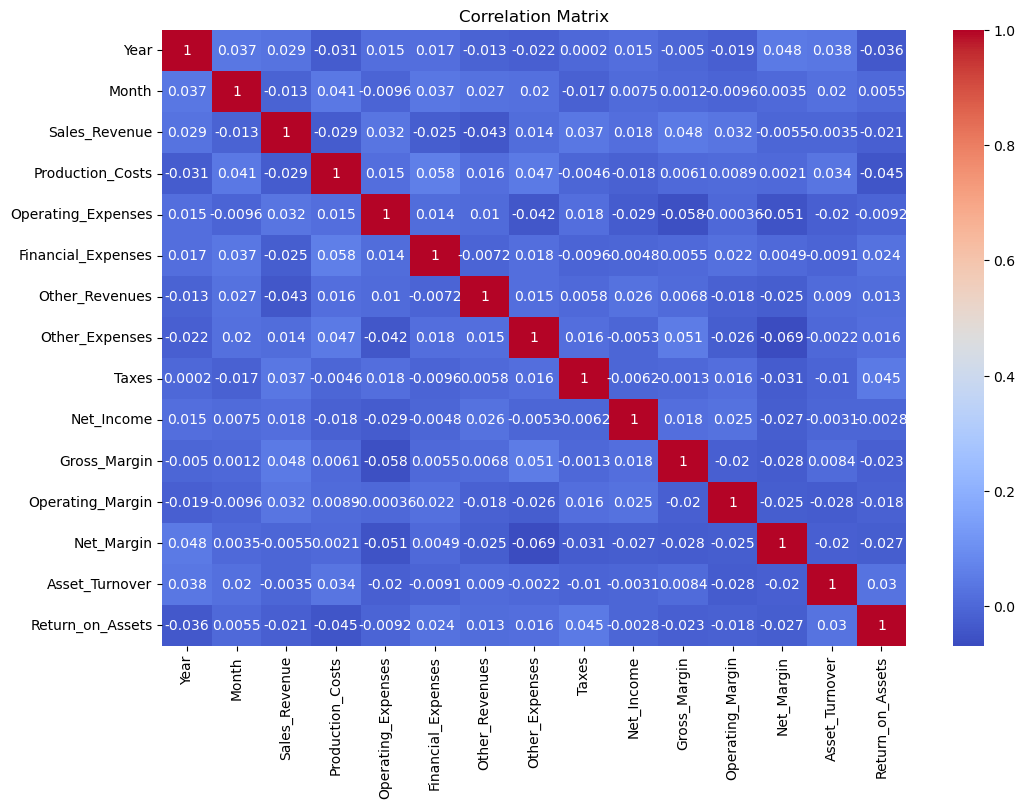

Statistical analysis completed.


In [20]:
# Distribution of Sales Revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales_Revenue'], kde=True)
plt.title('Distribution of Sales Revenue')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print("Statistical analysis completed.")

<Figure size 1400x700 with 0 Axes>

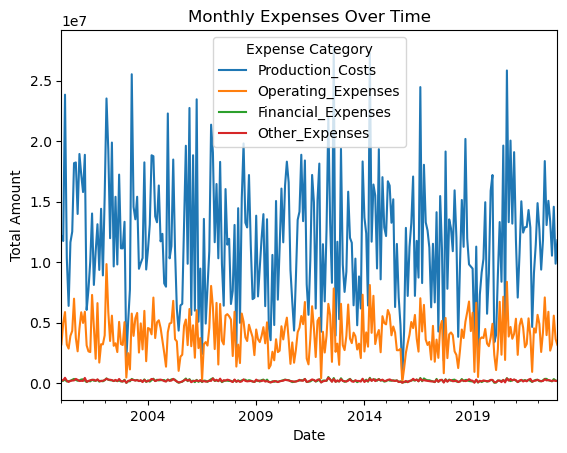

Monthly expenses over time plotted successfully.


In [21]:
# Convert 'Year' and 'Month' to datetime format 

df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample the data to monthly frequency and sum the expenses
monthly_expenses = df[['Production_Costs', 'Operating_Expenses', 'Financial_Expenses', 'Other_Expenses']].resample('M').sum()

# Plot monthly expenses and identify patterns and peaks
plt.figure(figsize=(14, 7))
monthly_expenses.plot()
plt.title('Monthly Expenses Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend(title='Expense Category')
plt.show()

print('Monthly expenses over time plotted successfully.')

<Figure size 1400x700 with 0 Axes>

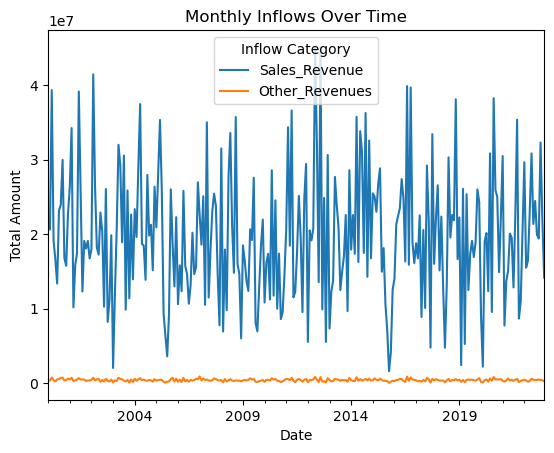

Monthly inflows over time plotted successfully.


In [22]:
# Analyze inflow patterns to understand revenue trends and sources

monthly_inflows = df[['Sales_Revenue', 'Other_Revenues']].resample('M').sum()

# Plot the monthly inflows to identify patterns and key periods
plt.figure(figsize=(14, 7))
monthly_inflows.plot()
plt.title('Monthly Inflows Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend(title='Inflow Category')
plt.show()

print('Monthly inflows over time plotted successfully.')